In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 日期
date = np.linspace(1, 15, 15)
print(date, date.shape)
# 收盘价
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,
                     2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
# 开盘价
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,
                       2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.] (15,)


## 神经网络
- 输入层 --> 隐藏层 --> 输出层
- 日期 --> 隐藏层 --> 股价
- A --> B --> C
    - A * w1 + b1 = B
    - B * w2 + b2 = C
    - w1和w2 -- 权重
    - b1和b2 -- 偏置
    
    
- A(15x1) * w1(1x10) + b1(1x10) = B(15x10)
- B(15x10) * w2(10x1) + b2(15x1) = C(15x1)

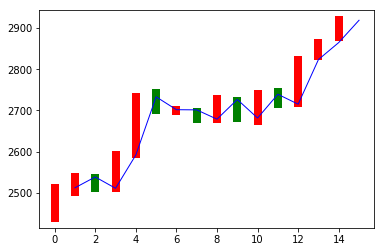

In [16]:
# 创建一个绘图实例
plt.figure()

# 绘制真实股价图
for i in range(0, 15):
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = endPrice[i]
    priceOne[1] = beginPrice[i]
    if endPrice[i] > beginPrice[i]:
        plt.plot(dateOne, priceOne, 'r', lw=8)
    else:
        plt.plot(dateOne, priceOne, 'g', lw=8)


# 归一化 日期和价格
dateNormal = np.zeros([15, 1])
priceNormal = np.zeros([15, 1])
for i in range(0, 15):
    dateNormal[i, 0] = i/14.0;
    priceNormal[i, 0] = endPrice[i]/3000.0;

# 定义两个占位符
x = tf.placeholder(tf.float32, [None, 1]) # 输入层: A 日期
y = tf.placeholder(tf.float32, [None, 1]) # 真实股价

# B
w1 = tf.Variable(tf.random_uniform([1, 10], 0, 1)) # 权重w1
b1 = tf.Variable(tf.zeros([1, 10])) # 偏置b1
wb1 = tf.matmul(x, w1) + b1 # 隐藏层B
layer1 = tf.nn.relu(wb1) # 激励函数

# C
w2 = tf.Variable(tf.random_uniform([10, 1], 0, 1)) # 权重w2
b2 = tf.Variable(tf.zeros([15, 1])) # 偏置b2
wb2 = tf.matmul(layer1, w2) + b2 # 输出层C
layer2 = tf.nn.relu(wb2) # 激励函数

# 方差
loss = tf.reduce_mean(tf.square(y-layer2)) # y是真实值,layer2是计算值

# 训练: 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 会话中执行operations
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化所有变量
    
    for i in range(0, 10000): # 训练10000次
        sess.run(train_step, feed_dict={x:dateNormal, y:priceNormal})
    
    # layer2就是我们训练出来的模型
    # 把日期喂给layer2,得到股价pred
    pred = sess.run(layer2, feed_dict={x:dateNormal})
    predPrice = np.zeros([15, 1])
    for i in range(0, 15):
        predPrice[i, 0] = (pred * 3000)[i, 0]
    plt.plot(date, predPrice, 'b', lw=1) # 绘制折线图
plt.show()